In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Ecommerce_DBS.csv")

 ###          Limpando e tratando a base de dados

In [3]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
NPS                      0
Customer Age             0
Gender                   0
Source                   0
Country                  0
State                    0
Latitude                 0
Longituide               0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   NPS                    250000 non-null  int64  
 7   Customer Age           250000 non-null  int64  
 8   Gender                 250000 non-null  object 
 9   Source                 250000 non-null  object 
 10  Country                250000 non-null  object 
 11  State                  250000 non-null  object 
 12  Latitude               250000 non-null  float64
 13  Longituide             250000 non-null  float64
dtypes: float64(2), int64(6), object(6)
m

In [6]:
df = df.drop(['Latitude', 'Longituide'], axis=1)

In [7]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y', errors='coerce')
df= df.sort_values(by='Purchase Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 78938 to 208549
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   NPS                    250000 non-null  int64         
 7   Customer Age           250000 non-null  int64         
 8   Gender                 250000 non-null  object        
 9   Source                 250000 non-null  object        
 10  Country                250000 non-null  object        
 11  State                  250000 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(5

In [8]:
# Corrigindo o erro de ortografia na coluna Source
df['Source'] = df['Source'].str.replace('Campign', 'Campaign')
df['Source'] = df['Source'].str.replace('campaign', 'Campaign')
print(df['Source'].unique())

['Instagram Campaign' 'FaceBook Campaign' 'SEM' 'Organic Search']


In [9]:
# Conferindo valores
df['Calculated Total'] = df['Product Price'] * df['Quantity']

valores_incorretos = df[df['Total Purchase Amount'] != df['Calculated Total']]

df.loc[df['Total Purchase Amount'] != df['Calculated Total'], 'Total Purchase Amount'] = df['Calculated Total']

print(df[['Total Purchase Amount', 'Calculated Total']])

        Total Purchase Amount  Calculated Total
78938                     986               986
146177                    681               681
139296                     96                96
92092                     402               402
114630                     69                69
...                       ...               ...
77643                     935               935
144603                    360               360
169750                    828               828
155693                    196               196
208549                   1092              1092

[250000 rows x 2 columns]


In [10]:
display(df)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Calculated Total
78938,3420,2020-01-01,Electronics,493,2,986,1,68,Female,Instagram Campaign,United States,Kansas,986
146177,36672,2020-01-01,Clothing,227,3,681,4,34,Male,FaceBook Campaign,United States,New York,681
139296,23134,2020-01-01,Electronics,24,4,96,10,44,Female,FaceBook Campaign,Canada,New Brunswick,96
92092,4003,2020-01-01,Electronics,201,2,402,0,64,Female,SEM,United States,California,402
114630,23282,2020-01-01,Electronics,23,3,69,6,32,Female,SEM,United States,Louisiana,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77643,40474,2023-09-15,Home,187,5,935,1,32,Female,FaceBook Campaign,United States,New York,935
144603,16696,2023-09-15,Clothing,72,5,360,6,41,Male,SEM,United States,Indiana,360
169750,45682,2023-09-15,Home,276,3,828,10,43,Female,SEM,Canada,Nova,828
155693,14082,2023-09-15,Electronics,196,1,196,9,35,Male,Organic Search,United States,New York,196


## Algumas considerações
* HOME refere-se a produtos relacionados à casa ou ao lar. 
* SEM, ou "Search Engine Marketing", é uma estratégia de marketing digital usada para aumentar a visibilidade de um site nos resultados dos motores de busca.

## Fazendo e respondendo perguntas

**Q1-Quais os produtos mais vendidos considerando os últimos 3 anos?**

In [11]:
# Encontrando a data mais recente no DataFrame
data_recente = df['Purchase Date'].max()
mais_vendidos = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print(mais_vendidos)

Product Category
Clothing       225322
Books          223876
Electronics    150828
Home           149698
Name: Quantity, dtype: int64


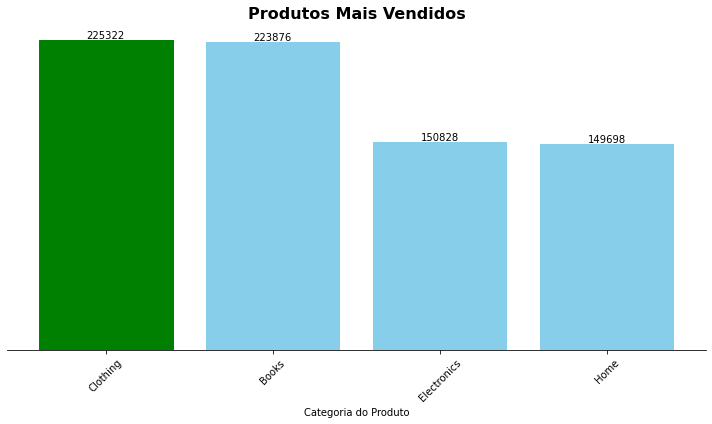

In [12]:
# Configurações do gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(mais_vendidos.index,mais_vendidos.values, color='skyblue')

# Adicionar rótulos de valor nas barras e pintar de verde a mais vendida
max_value = mais_vendidos.max()
for bar in bars:
    yval = bar.get_height()
    if yval == max_value:
        bar.set_color('green')
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Produtos Mais Vendidos',fontsize=16, fontweight='bold')
plt.xlabel('Categoria do Produto')

# Rotacionar rótulos do eixo x
plt.xticks(rotation=45)

# Remover linhas verticais e a borda do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().get_yaxis().set_ticks_position('none')  
plt.gca().yaxis.set_ticklabels([])  
plt.gca().xaxis.grid(False) 

plt.tight_layout()
plt.show()

**Produto mais vendido de cada mês em 3 anos**

In [13]:
# Adicionando colunas para ano e mês
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month

mais_vendidos_por_ano_mes = df.groupby(['Year', 'Month', 'Product Category'])['Quantity'].sum()

mais_vendidos_por_ano_mes = mais_vendidos_por_ano_mes.reset_index().sort_values(by=['Year', 'Month', 'Quantity'], ascending=[True, True, False])

produto_por_ano_mes = mais_vendidos_por_ano_mes.groupby(['Year', 'Month']).first().reset_index()

print(produto_por_ano_mes[['Year', 'Month', 'Product Category', 'Quantity']])

    Year  Month Product Category  Quantity
0   2020      1         Clothing      5320
1   2020      2            Books      4786
2   2020      3         Clothing      5161
3   2020      4         Clothing      4953
4   2020      5         Clothing      5219
5   2020      6         Clothing      5079
6   2020      7            Books      5200
7   2020      8            Books      5306
8   2020      9            Books      5097
9   2020     10         Clothing      5175
10  2020     11            Books      5112
11  2020     12            Books      5382
12  2021      1            Books      5257
13  2021      2         Clothing      4729
14  2021      3         Clothing      5123
15  2021      4         Clothing      4923
16  2021      5         Clothing      5385
17  2021      6            Books      4926
18  2021      7         Clothing      5002
19  2021      8         Clothing      5070
20  2021      9         Clothing      4754
21  2021     10         Clothing      5418
22  2021   

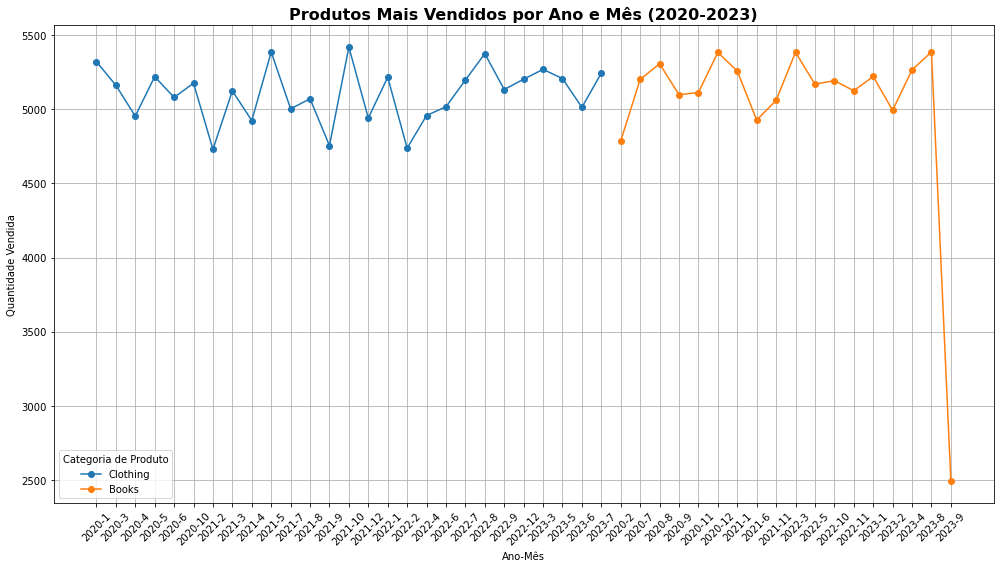

A queda drástica nas vendas de livros deve-se ao fato da base de dados conter registros apenas até o dia 15 do último mês. Portanto, o gráfico é coerente com os resultados.


In [14]:
plt.figure(figsize=(14, 8))
for category in produto_por_ano_mes['Product Category'].unique():
    subset = produto_por_ano_mes[produto_por_ano_mes['Product Category'] == category]
    plt.plot(subset['Year'].astype(str) + '-' + subset['Month'].astype(str), subset['Quantity'], marker='o', label=category)

plt.title('Produtos Mais Vendidos por Ano e Mês (2020-2023)',fontsize=16, fontweight='bold')
plt.xlabel('Ano-Mês')
plt.ylabel('Quantidade Vendida')
plt.legend(title='Categoria de Produto')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()
print("A queda drástica nas vendas de livros deve-se ao fato da base de dados conter registros apenas até o dia 15 do último mês. Portanto, o gráfico é coerente com os resultados.")

Os produtos mais vendidos em 3 anos são roupas e livros.

**Q2-Qual o produto mais caro e mais barato?**

In [15]:
maiores_precos = df.groupby("Product Category")["Product Price"].transform(max)

#preço  máximo 
df_preco_max = df[df["Product Price"] == maiores_precos]

df_preco_max

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Calculated Total,Year,Month
177488,40611,2020-01-03,Books,500,3,1500,8,48,Male,SEM,United States,Louisiana,1500,2020,1
165016,41449,2020-01-06,Home,500,1,500,9,22,Female,Organic Search,Canada,New Brunswick,500,2020,1
99606,12262,2020-01-21,Home,500,2,1000,2,42,Male,SEM,Canada,Ontario,1000,2020,1
144827,6353,2020-01-23,Clothing,500,3,1500,3,49,Female,SEM,United States,Alabama,1500,2020,1
159202,23593,2020-01-27,Electronics,500,2,1000,10,26,Female,FaceBook Campaign,Canada,British Columbia,1000,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150814,39031,2023-08-30,Books,500,1,500,5,56,Female,Instagram Campaign,United States,Georgia,500,2023,8
152849,17430,2023-09-04,Books,500,4,2000,9,67,Male,Organic Search,United States,Georgia,2000,2023,9
71706,44992,2023-09-08,Books,500,3,1500,9,35,Male,FaceBook Campaign,United States,New York,1500,2023,9
211784,9255,2023-09-10,Books,500,2,1000,5,48,Male,FaceBook Campaign,Canada,Nova,1000,2023,9


In [16]:
# Encontre o menor preço para cada produto
menores_precos = df.groupby("Product Category")["Product Price"].transform(min)

#preço mínimo 
df_preco_min = df[df["Product Price"] == menores_precos]

df_preco_min

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Calculated Total,Year,Month
58140,44101,2020-01-11,Books,10,1,10,2,22,Female,FaceBook Campaign,United States,New York,10,2020,1
68577,2964,2020-01-12,Books,10,3,30,9,21,Female,FaceBook Campaign,United States,New York,30,2020,1
155773,28448,2020-01-15,Books,10,5,50,10,24,Female,SEM,Canada,British Columbia,50,2020,1
174497,17917,2020-01-16,Books,10,3,30,7,61,Female,Instagram Campaign,Canada,Newfoundland and Labrador,30,2020,1
81082,11256,2020-01-24,Electronics,10,1,10,4,46,Female,Instagram Campaign,United States,New York,10,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13006,28387,2023-08-24,Clothing,10,4,40,7,50,Female,SEM,United States,California,40,2023,8
99072,35713,2023-08-27,Electronics,10,2,20,5,43,Female,FaceBook Campaign,United States,Alabama,20,2023,8
217271,36781,2023-08-30,Clothing,10,4,40,7,53,Female,SEM,Canada,Ontario,40,2023,8
208690,45366,2023-09-06,Electronics,10,2,20,2,46,Male,Instagram Campaign,United States,Indiana,20,2023,9


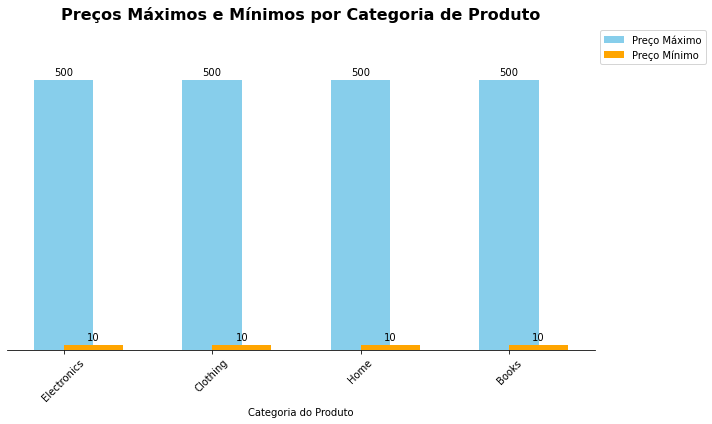

In [17]:
plt.figure(figsize=(10, 6))

# Obtenha as categorias de produtos únicas
categorias = df['Product Category'].unique()

# preços máximos e mínimos para cada categoria
precos_maximos = [df[df['Product Category'] == cat]['Product Price'].max() for cat in categorias]
precos_minimos = [df[df['Product Category'] == cat]['Product Price'].min() for cat in categorias]

# gráfico de barras
x = range(len(categorias))
bar_max = plt.bar(x, precos_maximos, width=0.4, label='Preço Máximo', color='skyblue', align='center')
bar_min = plt.bar(x, precos_minimos, width=0.4, label='Preço Mínimo', color='orange', align='edge')

#  rótulos de dados
for bar in bar_max:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 2), ha='center', va='bottom')

for bar in bar_min:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 2), ha='center', va='bottom')

#  rótulos e título
plt.xlabel('Categoria do Produto')
plt.title('Preços Máximos e Mínimos por Categoria de Produto',fontsize=16, fontweight='bold')
plt.xticks(x, categorias, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Posiciona a legenda fora da área do gráfico

# Remover linhas verticais e a borda do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().get_yaxis().set_ticks_position('none')  # Remove os ticks do eixo y
plt.gca().yaxis.set_ticklabels([])  # Remove os rótulos do eixo y
plt.gca().xaxis.grid(False)  # Remove linhas verticais de grade

plt.ylim(0, 1.2 * max(precos_maximos))

plt.tight_layout()

plt.show()

Ambas as categorias de produtos têm preços mínimos de 10 e máximos de 500.

**Q3-Qual é a categoria de produto mais vendida e menos vendida?Qual a categoria mais e menos cara?**

In [18]:
# Agrupando os registros pela categoria do produto e somando as quantidades vendidas
vendas_por_categoria = df.groupby('Product Category')['Quantity'].sum()

# Encontrando a categoria mais vendida
categoria_mais_vendida = vendas_por_categoria.idxmax()

# Encontrando a categoria menos vendida
categoria_menos_vendida = vendas_por_categoria.idxmin()

print("Categoria mais vendida:", categoria_mais_vendida)
print("Categoria menos vendida:", categoria_menos_vendida)

Categoria mais vendida: Clothing
Categoria menos vendida: Home


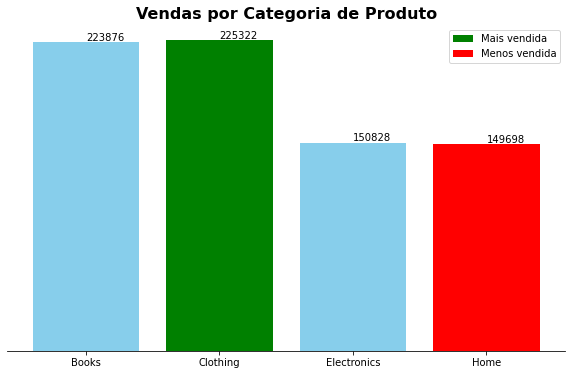

In [19]:

# Criando um gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(vendas_por_categoria.index, vendas_por_categoria.values, color='skyblue')

# Destacando a categoria mais vendida e a menos vendida
plt.bar(categoria_mais_vendida, vendas_por_categoria[categoria_mais_vendida], color='green', label='Mais vendida')
plt.bar(categoria_menos_vendida, vendas_por_categoria[categoria_menos_vendida], color='red', label='Menos vendida')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', color='black')  # va: vertical alignment

plt.title('Vendas por Categoria de Produto', fontsize=16, fontweight='bold',)  # Destaquei o título das barras
plt.legend()

# Remover linhas verticais e a borda do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().get_yaxis().set_ticks_position('none')  # Remove os ticks do eixo y
plt.gca().yaxis.set_ticklabels([])  # Remove os rótulos do eixo y
plt.gca().xaxis.grid(False)  # Remove linhas verticais de grade

plt.show()

A categoria de produtos mais vendida é a de roupas, enquanto a menos vendida é a de Homes.

In [20]:
preco_medio_por_categoria = df.groupby('Product Category')['Product Price'].mean()

# Encontrando a categoria mais cara
categoria_maior_preco = preco_medio_por_categoria.idxmax()

# Encontrando a categoria menos cara
categoria_menor_preco = preco_medio_por_categoria.idxmin()

print("Categoria mais cara:", categoria_maior_preco)
print("Categoria menos cara:", categoria_menor_preco)

Categoria mais cara: Home
Categoria menos cara: Clothing


A categoria mais cara pelo preço médio é a Home e a menos cara são as roupas.

**Q4-Qual o produto com melhor e pior NPS?**

In [21]:
# Calculando a média dos NPS para cada produto
media_nps_por_produto = df.groupby('Product Category')['NPS'].mean()

# Encontrando o produto com a média mais alta de NPS
melhor_nps = media_nps_por_produto.idxmax()

# Encontrando o produto com a média mais baixa de NPS
pior_nps = media_nps_por_produto.idxmin()

print("Produto com a melhor média de NPS:",melhor_nps)
print("Produto com a pior média de NPS:", pior_nps)

Produto com a melhor média de NPS: Home
Produto com a pior média de NPS: Electronics


A melhor média de NPS é a Home e a pior são os eletrônicos.

## Qual o tipo de publico considerando gênero e idade e o canal ideal para vender determinado tipo de produto?

In [22]:
df.columns = df.columns.str.strip()

# Verificando se as colunas necessárias estão presentes
if 'Customer Age' in df.columns and 'Product Category' in df.columns and 'Gender' in df.columns and 'Source' in df.columns:
    # Análise por Categoria de Produto
    categoria_por_demografia = df.groupby(['Product Category', 'Gender', pd.cut(df['Customer Age'], bins=[18, 30, 50, 70])]).size().unstack(fill_value=0)
    print("\nAnálise por Categoria de Produto:")
    print(categoria_por_demografia)

    # Análise por Canal de Venda
    canal_por_categoria = df.groupby(['Product Category', 'Source']).size().unstack(fill_value=0)
    print("\nAnálise por Canal de Venda:")
    print(canal_por_categoria)

    #Estratégias 
    canal_por_categoria_percentual = canal_por_categoria.div(canal_por_categoria.sum(axis=1), axis=0) * 100
    print("\nPorcentagem de Vendas por Canal de Venda para cada Categoria de Produto:")
    print(canal_por_categoria_percentual)
else:
    print("As colunas necessárias não estão presentes no DataFrame.")


Análise por Categoria de Produto:
Customer Age             (18, 30]  (30, 50]  (50, 70]
Product Category Gender                              
Books            Female      8626     14239     13880
                 Male        8828     13796     14058
Clothing         Female      8727     14250     14161
                 Male        8699     13976     13658
Electronics      Female      5755      9411      9460
                 Male        5910      9265      9366
Home             Female      5878      9358      9290
                 Male        5812      9212      9334

Análise por Canal de Venda:
Source            FaceBook Campaign  Instagram Campaign  Organic Search    SEM
Product Category                                                              
Books                         19951               20937           13798  20226
Clothing                      20111               20908           13984  20049
Electronics                   13452               14233            9174  13326
H

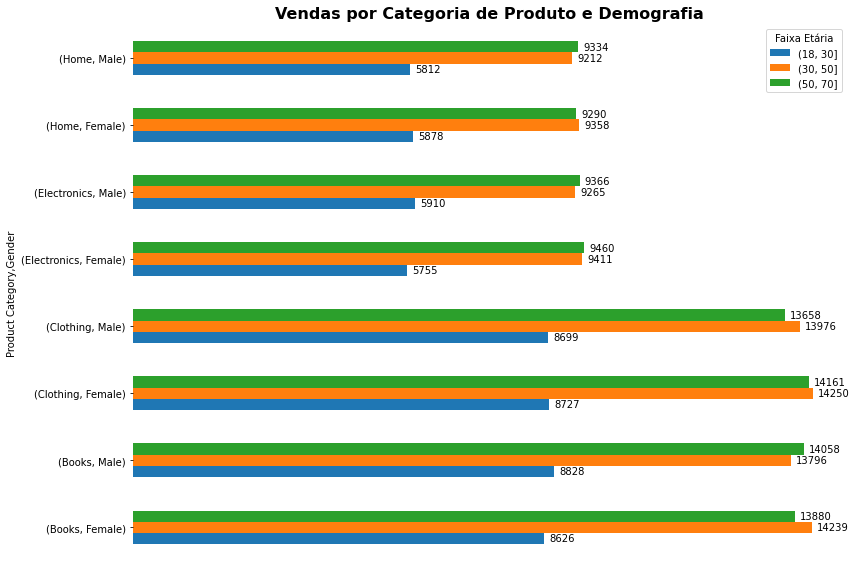

In [23]:
# Aumenta o tamanho do gráfico
ax = categoria_por_demografia.plot(kind='barh', figsize=(12, 8))
plt.title('Vendas por Categoria de Produto e Demografia', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade de Vendas')
plt.legend(title='Faixa Etária')
plt.tight_layout()

# Oculta o eixo x e suas linhas de grade
ax.xaxis.set_visible(False)
ax.grid(False, axis='x')

# Garanta que a linha do eixo y esteja visível
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adicionar rótulos de dados, com alinhamento
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=5)
plt.tight_layout()

plt.show()


In [24]:
# Analisando o público por gênero e idade para cada categoria de produto
publico = df.groupby(['Product Category', 'Gender']).agg({'Customer Age': ['mean', 'min', 'max']})

print("Análise do público por gênero e idade para cada categoria de produto:")
print(publico)

# Analisando o canal ideal para vender cada tipo de produto
canal = df.groupby(['Product Category', 'Source']).size().reset_index(name='Counts')

# Encontrando o canal com a contagem máxima para cada categoria de produto
canal_ideal = canal.loc[canal.groupby('Product Category')['Counts'].idxmax()]

print("\nCanal ideal para vender cada tipo de produto:")
print(canal_ideal)

Análise do público por gênero e idade para cada categoria de produto:
                        Customer Age        
                                mean min max
Product Category Gender                     
Books            Female    43.766018  18  70
                 Male      43.815032  18  70
Clothing         Female    43.760607  18  70
                 Male      43.596211  18  70
Electronics      Female    43.871777  18  70
                 Male      43.796424  18  70
Home             Female    43.676008  18  70
                 Male      43.838715  18  70

Canal ideal para vender cada tipo de produto:
   Product Category              Source  Counts
1             Books  Instagram Campaign   20937
5          Clothing  Instagram Campaign   20908
9       Electronics  Instagram Campaign   14233
13             Home  Instagram Campaign   14092


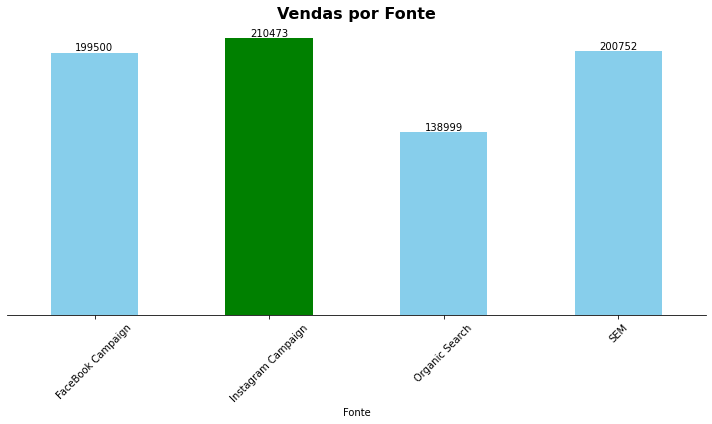

In [25]:
# Agrupar por fonte e somar as quantidades vendidas
vendas_fonte = df.groupby('Source')['Quantity'].sum()

# Encontrar a fonte que vendeu mais
mais_vendidas = vendas_fonte.idxmax()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Pintar de verde a coluna que mais vendeu
colors = ['skyblue' if source != mais_vendidas else 'green' for source in vendas_fonte.index]

vendas_fonte.plot(kind='bar', color=colors)

# Adicionar rótulos de dados
for i, value in enumerate(vendas_fonte):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title('Vendas por Fonte',fontsize=16, fontweight='bold')
plt.xlabel('Fonte')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para facilitar a leitura
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().get_yaxis().set_ticks_position('none')  # Remove os ticks do eixo y
plt.gca().yaxis.set_ticklabels([])  # Remove os rótulos do eixo y
plt.gca().xaxis.grid(False)  # Remover linhas verticais de grade
plt.tight_layout()

plt.show()

#  Conclusões

* Roupas e livros alternam em popularidade ao longo do ano, dependendo da estação. Podemos adotar diferentes estratégias de vendas para cada produto de acordo com a demanda sazonal.
* Homens e mulheres acima dos 30 anos são o melhor público para a venda de roupas e livros.
* O Instagram lidera como o melhor canal para vender produtos.
